# **Recommendation System**

## Business Understanding

### Problem Statements

### Goals

### Solution Statements

## Data Understanding

- Import Library

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import  WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import  cosine_similarity


- Load Data

In [129]:
df = pd.read_csv('../data/steam.csv')

## Exploration Data Analysis

In [130]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [131]:
df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

In [132]:
df.isna().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [133]:
df.duplicated().sum()

np.int64(0)

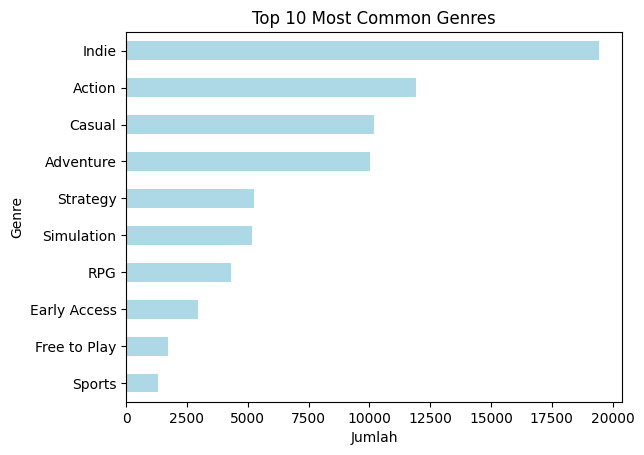

In [134]:
df['genres'].str.split(';').explode().value_counts().head(10).plot(kind='barh', color='lightblue')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Jumlah")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.show()

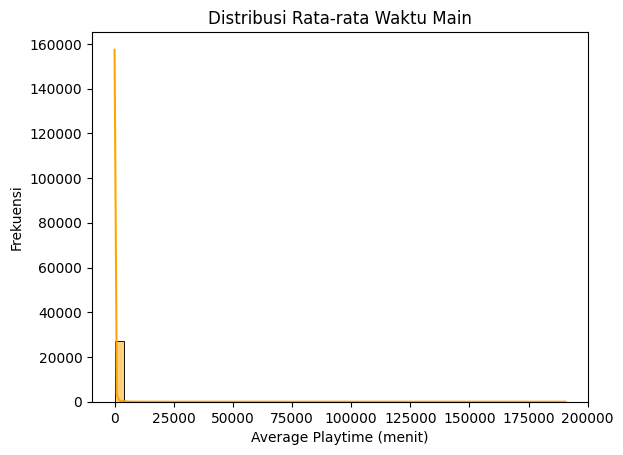

In [135]:
sns.histplot(df['average_playtime'], bins=50, kde=True, color='orange')
plt.title("Distribusi Rata-rata Waktu Main")
plt.xlabel("Average Playtime (menit)")
plt.ylabel("Frekuensi")
plt.show()

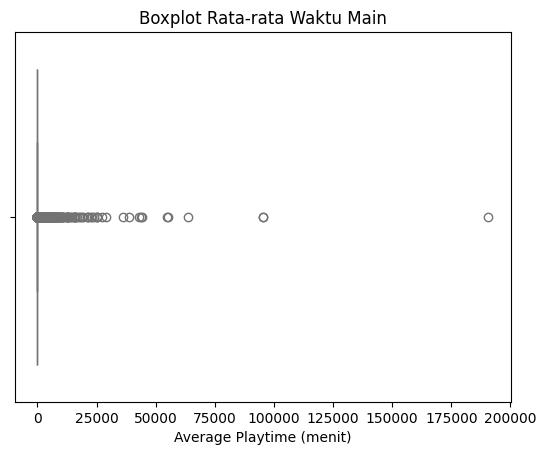

In [136]:
sns.boxplot(x=df['average_playtime'], color='lightgreen')
plt.title("Boxplot Rata-rata Waktu Main")
plt.xlabel("Average Playtime (menit)")
plt.show()

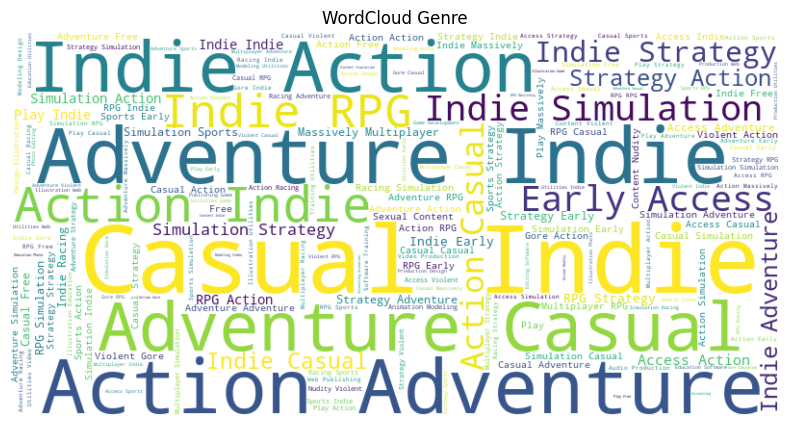

In [137]:
text = ' '.join(df['genres'].dropna().str.replace(';', ' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Genre")
plt.show()


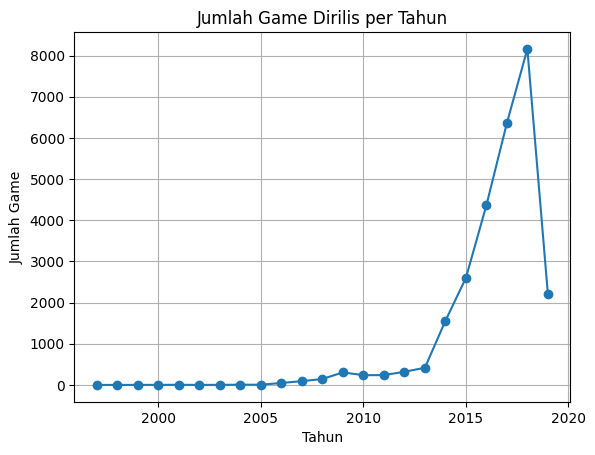

In [138]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Jumlah Game Dirilis per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Game")
plt.grid(True)
plt.show()


In [139]:
numeric = df[['price', 'positive_ratings', 
              'negative_ratings','required_age', 'achievements']]
def check_outlier(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier = df[(df[data] < lower) | (df[data]>upper)]
    print(f"Kolom {data} : {len(outlier)} Outlier")


In [140]:
for i in numeric:
    check_outlier(i)

Kolom price : 1975 Outlier
Kolom positive_ratings : 4286 Outlier
Kolom negative_ratings : 3957 Outlier
Kolom required_age : 596 Outlier
Kolom achievements : 1695 Outlier


## Data Preparation

In [141]:
df = df.dropna()

In [142]:
df = df.drop(columns=['appid'], axis=1)
df['required_age'] = df['required_age'].astype(float)
df['achievements'] = df['achievements'].astype(float)
df['positive_ratings'] = df['positive_ratings'].astype(float)
df['negative_ratings'] = df['negative_ratings'].astype(float)
df['average_playtime'] = df['average_playtime'].astype(float)
df['median_playtime'] = df['median_playtime'].astype(float)
df['price'] = df['price'].astype(float)
df['combined'] = df['genres'].fillna('') + ' ' + df['developer'].fillna('')

In [143]:
numeric = df[['price', 'positive_ratings', 
              'negative_ratings', 'required_age', 'achievements']]
def outlier_handling(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[df[data] > upper, data] = upper
    df.loc[df[data] < lower, data] = lower

In [144]:
for i in numeric:
    outlier_handling(i)
    check_outlier(i)

Kolom price : 0 Outlier
Kolom positive_ratings : 0 Outlier
Kolom negative_ratings : 0 Outlier
Kolom required_age : 0 Outlier
Kolom achievements : 0 Outlier


In [145]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


MemoryError: Unable to allocate 5.46 GiB for an array with shape (27061, 27061) and data type float64

## Modelling

In [ ]:
def get_recommendations(name, cosine_sim=cosine_sim):
    idx = df[df['name'].str.lower() == name.lower()].index
    if len(idx) == 0:
        return f"Game '{name}' tidak ditemukan di dataset."
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    game_indices = [i[0] for i in sim_scores]
    return df[['name', 'genres', 'developer']].iloc[game_indices]

## Evaluation

In [ ]:
get_recommendations("Grand Theft Auto V")